# 1. Read in the Data

In [104]:
#from ydata_profiling import ProfileReport
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_feather("data/merged_airlines.feather")

In [5]:
data['creation_time'] = pd.to_datetime(data['creation_time'])
data = data.set_index('creation_time')

# 2. Understanding the Data

In [6]:
data.head()

,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,DO_WI weight,...,ESTIMATED_TRAFFIC_LOAD,ESTIMATED_ZFW,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight,airport_name,city,region,country_name,continent
creation_time,,,,,,,,,,,,,,,,,,,,,
2024-04-30 04:01:00,33766922,AB,2373,30,IXB,service-acco,CheckinMsgProcessor,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS
2024-04-30 04:01:00,33766923,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS
2024-04-30 04:01:00,33766924,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS
2024-04-30 04:01:00,33766925,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,44296.0,38.53,44795.0,...,15915.44,60710.44,NaN,NaN,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS
2024-04-30 04:01:00,33766926,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1571.0,Bagdogra Airport,Siliguri,IN-WB,India,AS


In [7]:
data.tail()

,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,DO_WI weight,...,ESTIMATED_TRAFFIC_LOAD,ESTIMATED_ZFW,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight,airport_name,city,region,country_name,continent
creation_time,,,,,,,,,,,,,,,,,,,,,
2024-05-07 09:20:24,375567187,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,29946.0,...,NaN,30216.0,0.0,NaN,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA
2024-05-07 09:20:24,375567248,ZY,3616,7,VCP,service-acco,CreateBaggageLoadItemsAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA
2024-05-07 09:20:24,375567249,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,29946.0,...,NaN,30180.0,0.0,NaN,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA
2024-05-07 09:20:24,375567250,ZY,3616,7,VCP,service-acco,StorePaxDataAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,Viracopos International Airport,Campinas,BR-SP,Brazil,SA
2024-05-07 09:20:24,375567251,ZY,3616,7,VCP,service-acco,PAXBOOKINGINMsgProcessor,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA


In [8]:
data.shape

(2248299, 63)

In [9]:
data.dtypes

id                    int64
airline_code         object
flight_number         int64
flight_date           int64
departure_airport    object
                      ...  
airport_name         object
city                 object
region               object
country_name         object
continent            object
Length: 63, dtype: object

In [10]:
data.describe()

,id,flight_number,flight_date,START_WI weight,START_WI index,DO_WI weight,DO_WI index,PAX_WI weight,PAX_WI index,TOTAL_DEADLOAD_WI weight,...,FWD_MOVABLE_PAX,AFT_MOVABLE_PAX,INDEX_OUT_OF_BALANCE,LOAD_TO_AFT,LOAD_TO_FWD,ESTIMATED_TRAFFIC_LOAD,ESTIMATED_ZFW,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight
count,2.248299e+06,2.248299e+06,2.248299e+06,3.665950e+05,366595.000000,3.418880e+05,341881.000000,3.665950e+05,307793.000000,2.830810e+05,...,0.0,0.0,23148.000000,6818.000000,579.000000,3.055810e+05,3.418880e+05,1.867950e+05,0.0,2.514870e+05
mean,1.506280e+08,2.381134e+03,7.198636e+00,6.206915e+04,44.924934,8.453828e+04,46.397202,1.199014e+04,7.442871,1.052000e+05,...,NaN,NaN,8.214977,2812.661088,328.993886,1.574375e+04,9.219580e+04,3.561927e+02,NaN,3.113199e+03
std,1.183784e+08,1.498802e+03,8.468916e+00,2.706786e+05,8.896044,6.091942e+05,35.147258,6.304777e+04,7.865908,7.309253e+05,...,NaN,NaN,4.879979,16528.808171,556.869830,6.486619e+04,5.736328e+05,5.033826e+03,NaN,1.234162e+05
min,3.376491e+07,0.000000e+00,1.000000e+00,1.238800e+04,4.650000,1.264800e+04,0.950000,0.000000e+00,0.000000,4.193300e+04,...,NaN,NaN,0.030000,4.330000,5.530000,0.000000e+00,1.264800e+04,0.000000e+00,NaN,0.000000e+00
25%,3.434494e+07,1.276000e+03,2.000000e+00,4.188900e+04,37.430000,4.329400e+04,37.420000,1.393000e+03,0.000000,4.497100e+04,...,NaN,NaN,4.540000,553.710000,79.670000,1.149100e+04,5.381800e+04,0.000000e+00,NaN,9.750000e+02
50%,1.379445e+08,2.102000e+03,4.000000e+00,4.410600e+04,42.120000,4.475700e+04,41.220000,1.136800e+04,5.800000,4.618000e+04,...,NaN,NaN,7.400000,1679.280000,232.590000,1.401500e+04,5.797100e+04,0.000000e+00,NaN,1.391000e+03
75%,1.385139e+08,2.563000e+03,6.000000e+00,4.502400e+04,51.500000,4.552300e+04,53.040000,1.300200e+04,12.080000,4.936900e+04,...,NaN,NaN,11.130000,1679.280000,426.990000,1.570800e+04,6.140650e+04,2.360000e+02,NaN,1.820000e+03
max,3.755673e+08,9.902000e+03,3.000000e+01,1.231061e+07,83.020000,1.283106e+07,1053.150000,2.010615e+06,45.510000,1.401068e+07,...,NaN,NaN,39.730000,181035.860000,11086.290000,2.710681e+06,1.562107e+07,1.107050e+06,NaN,1.030103e+07


In [11]:
data["airline_code"].unique()

array(['AB', 'MN', 'ZY'], dtype=object)

In [12]:
data["flight_number"].unique()

array([2373, 2371, 2385, ..., 9902, 2213, 2414], dtype=int64)

In [13]:
data["departure_airport"].unique()

array(['IXB', 'GOX', 'BOM', 'BLR', 'AMD', 'DEL', 'VNS', 'BBI', 'IXZ',
       'COK', 'GAU', 'GWL', 'LKO', 'MAA', 'AYJ', 'PNQ', 'CCU', 'HYD',
       'IXA', 'SXR', 'DOH', 'SIN', 'DXB', 'SIG', 'RUP', 'DUB', 'MAN',
       'ORK', 'LHR', 'MAD', 'MUC', 'AGP', 'NOC', 'EWR', 'JFK', 'IAD',
       'ORD', 'MCO', 'YYZ', 'BDL', 'BOS', 'LAX', 'SFO', 'PHL', 'SNN',
       'CLE', 'SEA', 'CDG', 'VCE', 'FAO', 'BGI', 'PGF', 'MSP', 'NAP',
       'BOD', 'FCO', 'DUS', 'CMH', 'TLS', 'LPA', 'BEL', 'SDU', 'VCP',
       'SLZ', 'SSA', 'GRU', 'BVB', 'CGH', 'IMP', 'MCZ', 'REC', 'NAT',
       'CGB', 'GYN', 'POA', 'VIX', 'CWB', 'IPN', 'IGU', 'GIG', 'PVH',
       'MOC', 'BSB', 'MAO', 'CGR', 'PPB', 'UDI', 'CNF', 'FLN', 'PNZ',
       'RAO', 'BPS', 'XAP', 'CPV', 'SJP', 'FLL', 'FOR', 'LDB', 'JTC',
       'MGF', 'JPA', 'JOI', 'JDO', 'AJU', 'NVT', 'STM', 'THE', 'ORY',
       'FEN', 'LIS', 'CAC', 'VDC', 'UBA', 'ARU', 'IZA', 'PFB', 'CMG',
       'CAW', 'URG', 'BYO', 'CKS', 'LEC', 'SJL', 'MAB', 'MII', 'BVH',
       'OAL', 'OPS',

In [14]:
data["action_name"].unique()

array(['CheckinMsgProcessor', 'StorePaxDataAction',
       'CalculateWeightAndTrimAction', 'UpdateLoadTableAction',
       'AssignUnassignViewAction', 'UpdateSupplementaryInfoAction',
       'CloseLegAction', 'InternalCreateLoadingInstructionAct',
       'InternalCreateLoadsheetAction',
       'CreatePostDepartureMessagesAction',
       'SendPostDepartureMessagesAction',
       'UpdateHistoricalFlightLegInfoAction',
       'SetActualBagWeightIndicatorAction',
       'FlightPlanFiguresInMsgProcessor', 'UpdateFuelDataAction',
       'CreateLoadingInstructionAction', 'RampFinalAction',
       'CreateLoadsheetAction', 'UpdateEstimatesAction',
       'CreateZFWMessageAction', 'CrewMsgProcessor',
       'UpdateCrewDataAction', 'PAXBOOKINGINMsgProcessor',
       'EstimateStorePaxDataAction', 'CreateBaggageLoadItemsAction',
       'TransferCheckinDataAction', 'StoreAircraftDataAction',
       'SpecialPaxWeightAction', 'CargoFinalAction',
       'AssignLoadplanAction', 'AcceptTransitDataAction'

In [15]:
data["country_name"].unique()

array(['India', 'Qatar', 'Singapore', 'United Arab Emirates',
       'Puerto Rico', 'Ireland', 'United Kingdom', 'Spain', 'Germany',
       'United States', 'Canada', 'France', 'Italy', 'Portugal',
       'Barbados', 'Brazil', 'Uruguay', 'Argentina', 'Curaçao', 'Namibia'],
      dtype=object)

In [16]:
data["city"].unique()

array(['Siliguri', 'Mopa', 'Mumbai', 'Bangalore', 'Ahmedabad',
       'New Delhi', 'Varanasi', 'Bhubaneswar', 'Port Blair', 'Kochi',
       'Guwahati', 'Gwalior', 'Lucknow', 'Chennai', 'Faizabad', 'Pune',
       'Kolkata', 'Hyderabad', 'Agartala', 'Srinagar', 'Doha',
       'Singapore', 'Dubai', 'San Juan', 'Rupsi', 'Dublin', 'Manchester',
       'Cork', 'London', 'Madrid', 'Munich', 'Málaga', 'Charlestown',
       'Newark', 'New York', 'Dulles', 'Chicago', 'Orlando', 'Toronto',
       'Hartford', 'Boston', 'Los Angeles', 'San Francisco',
       'Philadelphia', 'Shannon', 'Cleveland', 'Seattle', 'Paris',
       'Venezia (VE)', 'Faro', 'Bridgetown', 'Perpignan/Rivesaltes',
       'Minneapolis', 'Napoli', 'Bordeaux/Mérignac', 'Rome', 'Düsseldorf',
       'Columbus', 'Toulouse/Blagnac', 'Gran Canaria Island', 'Belém',
       'Rio de Janeiro', 'Campinas', 'São Luís', 'Salvador', 'São Paulo',
       'Boa Vista', 'Imperatriz', 'Maceió', 'Recife', 'Natal', 'Cuiabá',
       'Goiânia', 'Porto A

In [17]:
data["airport_name"].unique()

array(['Bagdogra Airport', 'Mopa International Airport',
       'Chhatrapati Shivaji International Airport',
       'Kempegowda International Airport',
       'Sardar Vallabh Bhai Patel International Airport',
       'Indira Gandhi International Airport',
       'Lal Bahadur Shastri Airport', 'Biju Patnaik Airport',
       'Veer Savarkar International Airport / INS Utkrosh',
       'Cochin International Airport',
       'Lokpriya Gopinath Bordoloi International Airport',
       'Gwalior Airport', 'Chaudhary Charan Singh International Airport',
       'Chennai International Airport', 'Ayodhya Airport',
       'Pune Airport / Lohagaon Air Force Station',
       'Netaji Subhash Chandra Bose International Airport',
       'Rajiv Gandhi International Airport',
       'Agartala - Maharaja Bir Bikram Airport',
       'Sheikh ul Alam International Airport',
       'Hamad International Airport', 'Singapore Changi Airport',
       'Dubai International Airport',
       'Fernando Luis Ribas Domini

In [18]:
#profile = ProfileReport(data, title="Profiling Report", minimal=True)

## Data Visualizations

In [19]:
# Filter data for a pre-selected airline
selected_airline = 'AB' # ZY, MN
filtered_data = data[data['airline_code'] == selected_airline]

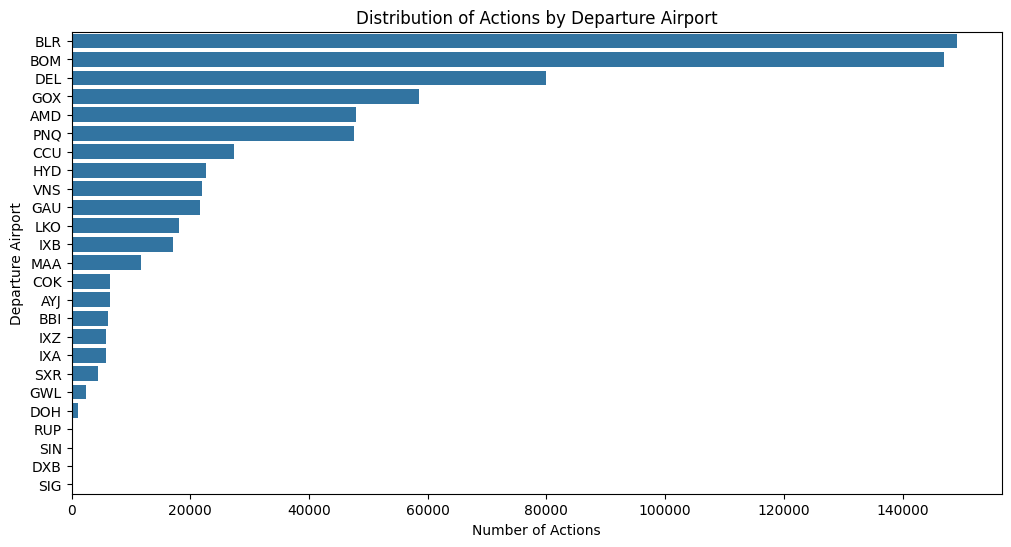

In [20]:
# Plot the distribution of departure airports
plt.figure(figsize=(12, 6))
sns.countplot(y='departure_airport', data=filtered_data, order=filtered_data['departure_airport'].value_counts().index)
plt.title('Distribution of Actions by Departure Airport')
plt.ylabel('Departure Airport')
plt.xlabel('Number of Actions')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

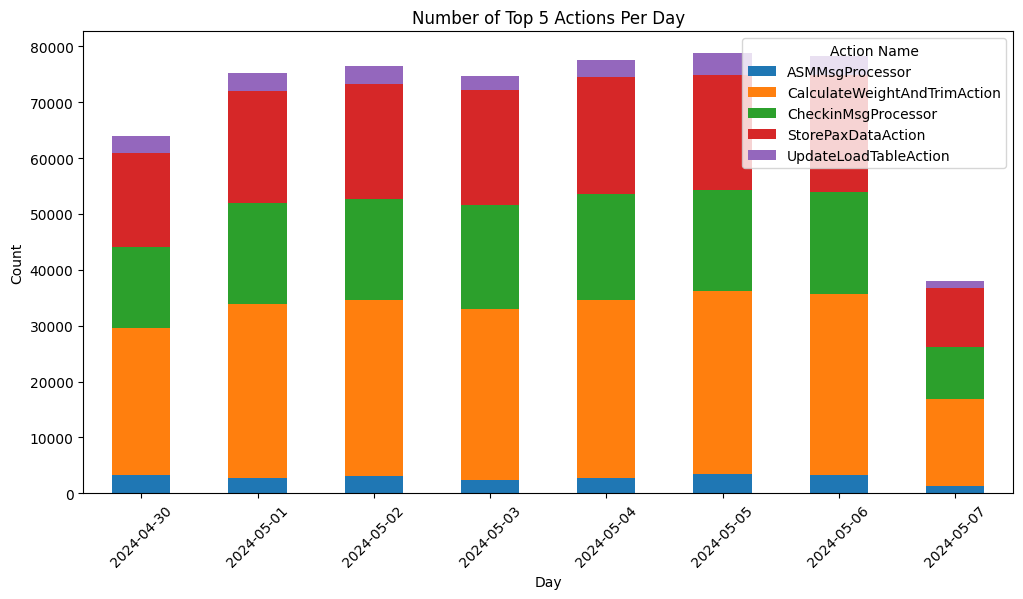

In [21]:
# Identify the top 5 most occurring actions
top_actions = filtered_data['action_name'].value_counts().nlargest(5).index

# Filter data_cleaned to include only the top 5 actions
top_filtered = filtered_data[filtered_data['action_name'].isin(top_actions)]

# Resample data to day and sum the action counts
action_counts = top_filtered.groupby([top_filtered.index.date, 'action_name']).size().unstack(fill_value=0)

# Plot number of actions per day for the top 5 actions
plt.figure(figsize=(12, 6))
action_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Top 5 Actions Per Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend(title='Action Name')
plt.xticks(rotation=45)
plt.show()

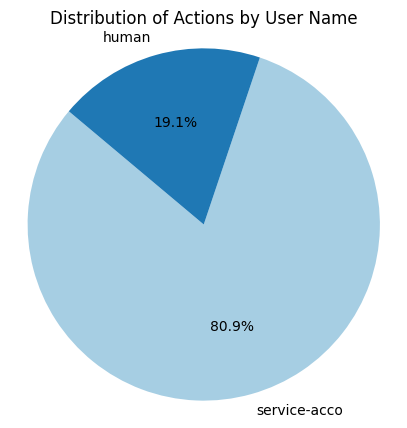

In [22]:
# Count the occurrences of each user_name
user_counts = filtered_data['user_name'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Actions by User Name')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

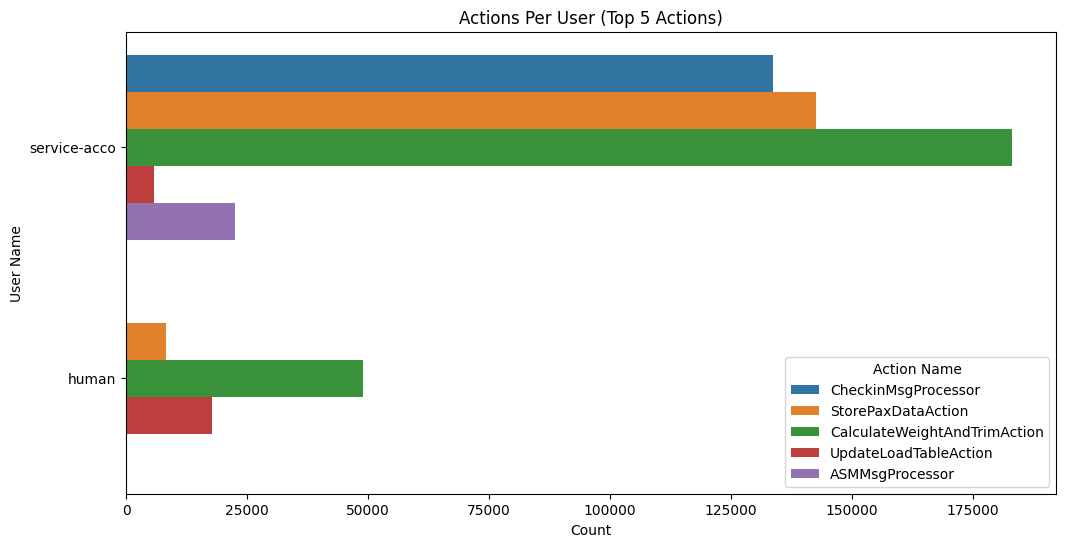

In [23]:
# Identify the top 5 most occurring actions
top_actions = filtered_data['action_name'].value_counts().nlargest(5).index

# Filter data_cleaned to include only the top 5 actions
top_5_filtered = filtered_data[filtered_data['action_name'].isin(top_actions)]

# Plot actions per user for the top 5 actions
plt.figure(figsize=(12, 6))
sns.countplot(y='user_name', hue='action_name', data=top_5_filtered)
plt.title('Actions Per User (Top 5 Actions)')
plt.xlabel('Count')
plt.ylabel('User Name')
plt.legend(title='Action Name')
plt.show()

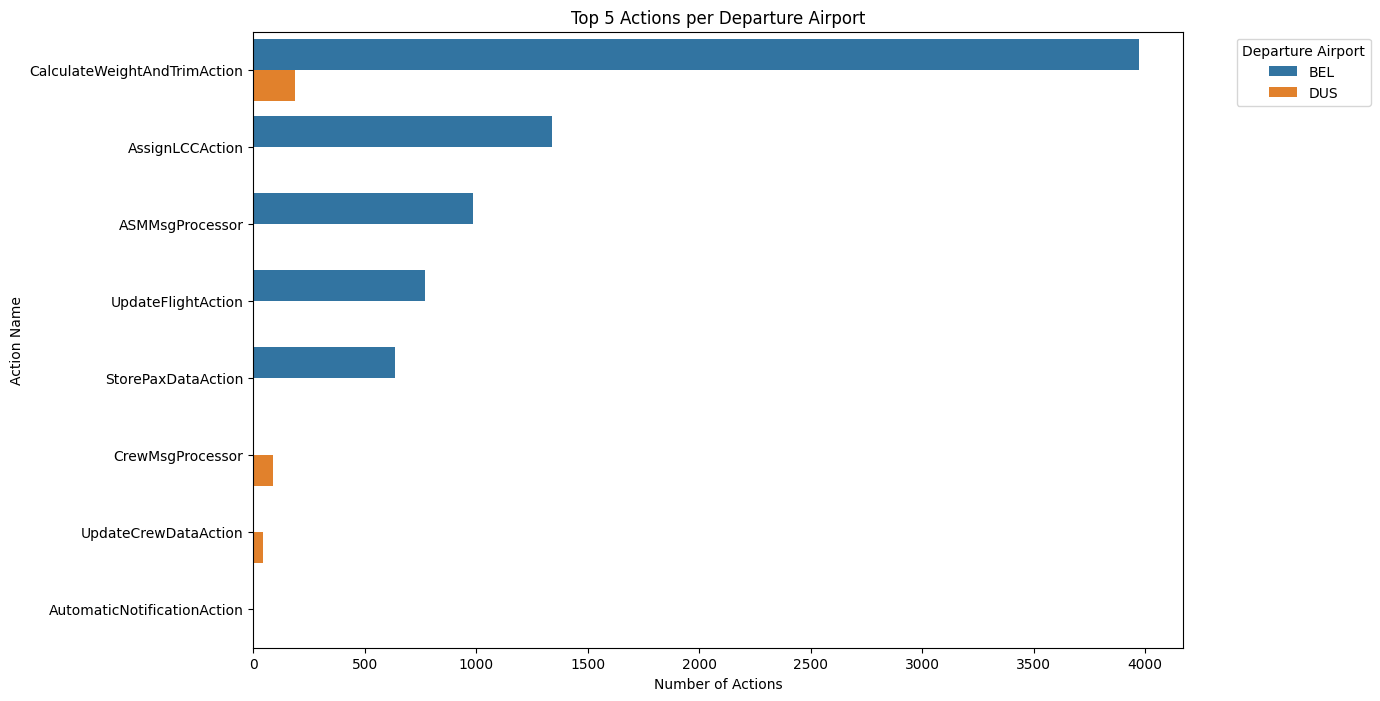

In [24]:
# Filter for two specific departure airports
filtered_airports = ['DUS', 'BEL']
df_filtered = data[data['departure_airport'].isin(filtered_airports)]

# Group by departure_airport and action_name, then count occurrences
action_counts = df_filtered.groupby(['departure_airport', 'action_name']).size().reset_index(name='count')

# Sort the counts in descending order and select the top 5 actions per departure_airport
top_actions = action_counts.sort_values(['departure_airport', 'count'], ascending=[True, False]).groupby('departure_airport').head(5)

# Visualize the top 5 actions per departure_airport
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='action_name', hue='departure_airport', data=top_actions, dodge=True)
plt.title('Top 5 Actions per Departure Airport')
plt.xlabel('Number of Actions')
plt.ylabel('Action Name')
plt.legend(title='Departure Airport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Vergleich zwischen geplante und finale Gewichtswerte

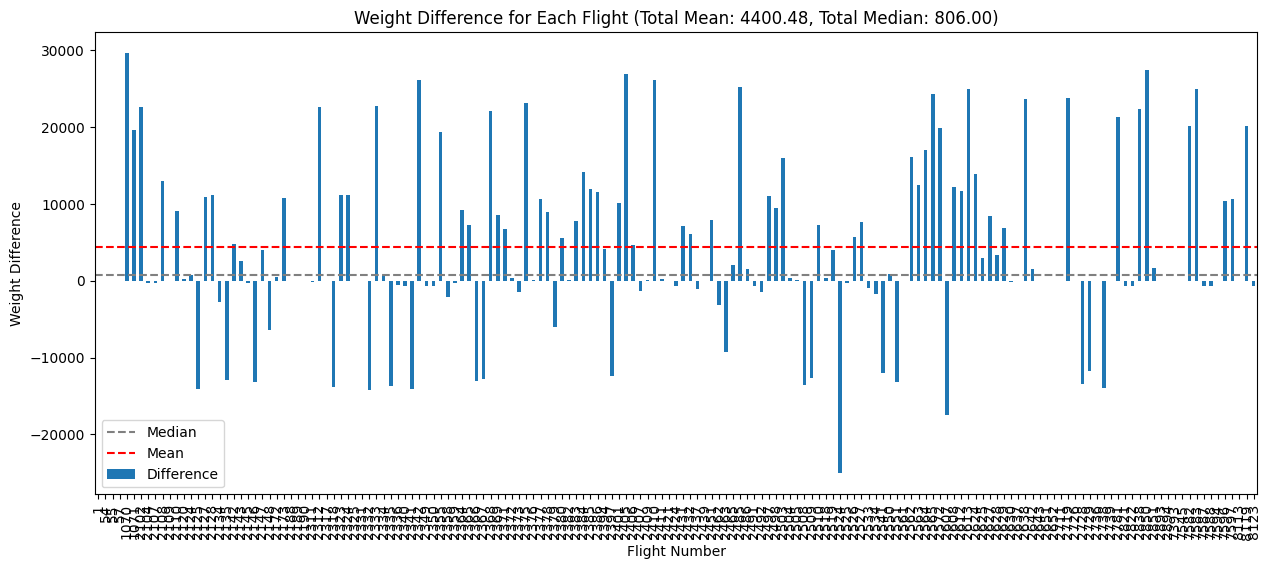

In [110]:
# Get the first 'ATOW' and the last 'ATOW' for each flight
first_weight = filtered_data.groupby('flight_number')["ATOW"].first()
last_weight = filtered_data.groupby('flight_number')['ATOW'].last()

# Abweichung vom finalen TOW zum initialen/geplanten TOW Gewicht
# Postive differenz ist Unterschätzung sonst überschätzung
difference = last_weight - first_weight

# Plot the difference
plt.figure(figsize=(15,6))
difference.plot(kind='bar')
# add reference line median and mean
plt.axhline(difference.median(), color='gray', linestyle='--')
plt.axhline(difference.mean(), color='red', linestyle='--')
# add legend
plt.legend(['Median', 'Mean', 'Difference'])
plt.xlabel('Flight Number')
plt.ylabel('Weight Difference')
# add title with mean and median
plt.title(f'Weight Difference for Each Flight (Total Mean: {difference.mean():.2f}, Total Median: {difference.median():.2f})')
plt.show()

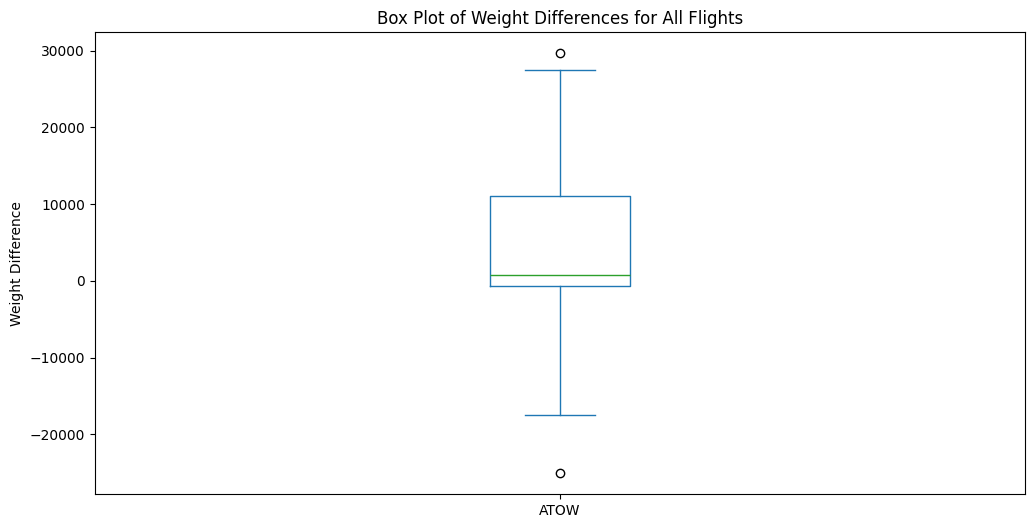

In [113]:
plt.figure(figsize=(12,6))
difference.plot(kind='box')
plt.ylabel('Weight Difference')
plt.title('Box Plot of Weight Differences for All Flights')
plt.show()

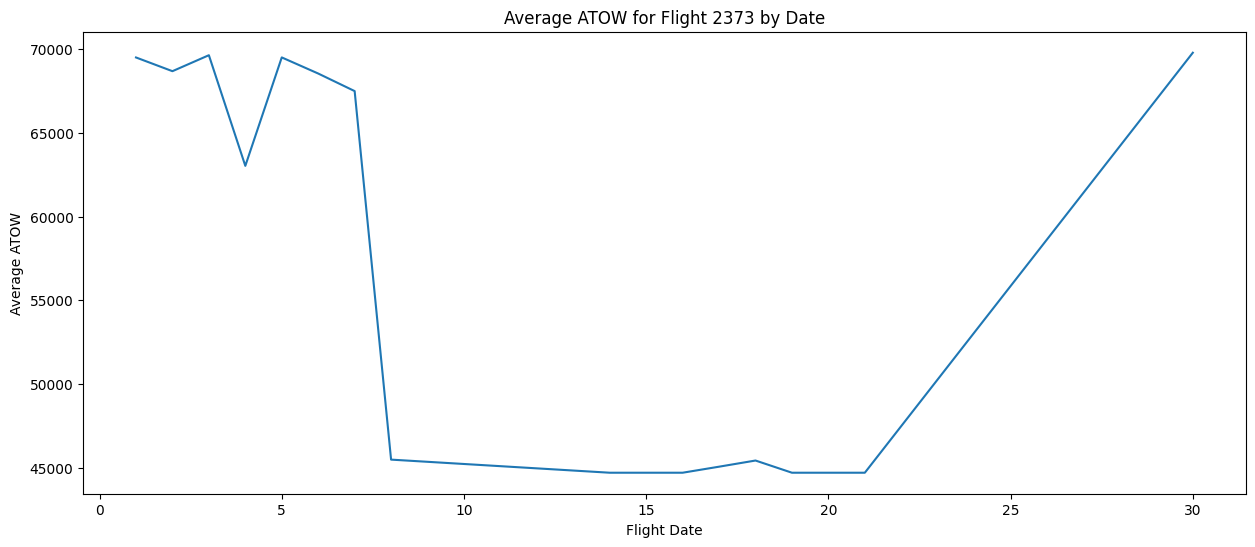

In [122]:


# Filter the data for flight 2373
flight_data = filtered_data[filtered_data['flight_number'] == 2373]

# Group by 'flight_date' and calculate mean 'ATOW'
grouped_data = flight_data.groupby('flight_date')['ATOW'].mean()

# Plot the 'ATOW' values, skipping NaN values
plt.figure(figsize=(15,6))
plt.plot(grouped_data.dropna())

plt.xlabel('Flight Date')
plt.ylabel('Average ATOW')
plt.title('Average ATOW for Flight 2373 by Date')
plt.show()

C:\Users\Emre\AppData\Local\Temp\ipykernel_8764\4182166125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data.dropna(subset=['ATOW'], inplace=True)


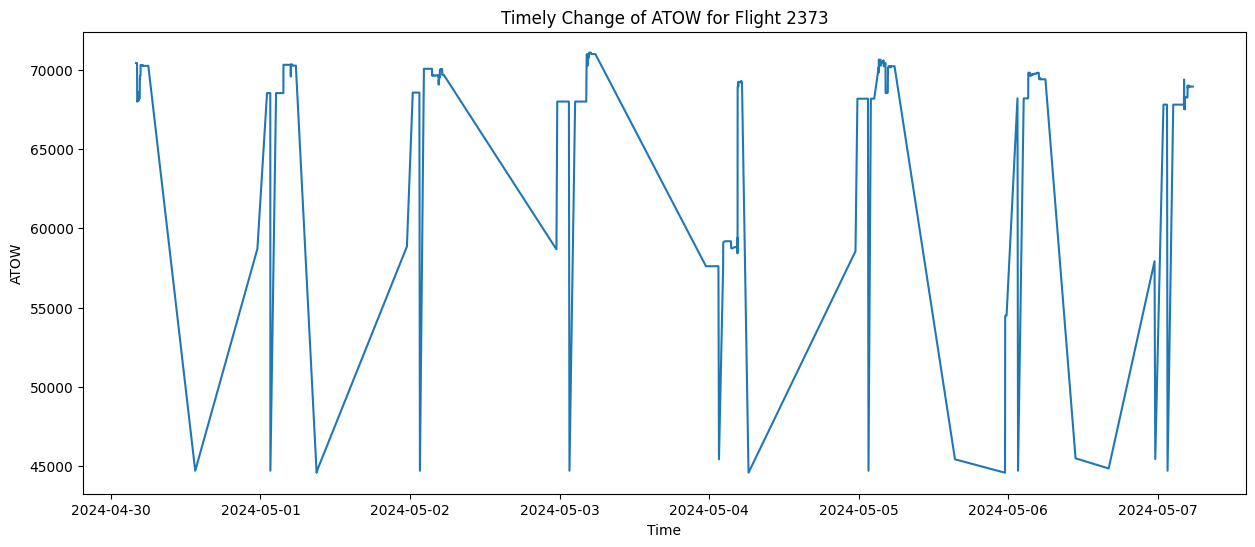

In [116]:
# Filter the data for flight 2373
flight_data = filtered_data[filtered_data['flight_number'] == 2373]
flight_data.dropna(subset=['ATOW'], inplace=True)

# Plot the 'ATOW' values
plt.figure(figsize=(15,6))
plt.plot(flight_data['ATOW'])

plt.xlabel('Time')
plt.ylabel('ATOW')
plt.title('Timely Change of ATOW for Flight 2373')
plt.show()

C:\Users\Emre\AppData\Local\Temp\ipykernel_8764\316743887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data['Difference'] = flight_data['ATOW'] - flight_data['START_WI weight']
C:\Users\Emre\AppData\Local\Temp\ipykernel_8764\316743887.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data.dropna(subset=['Difference'], inplace=True)


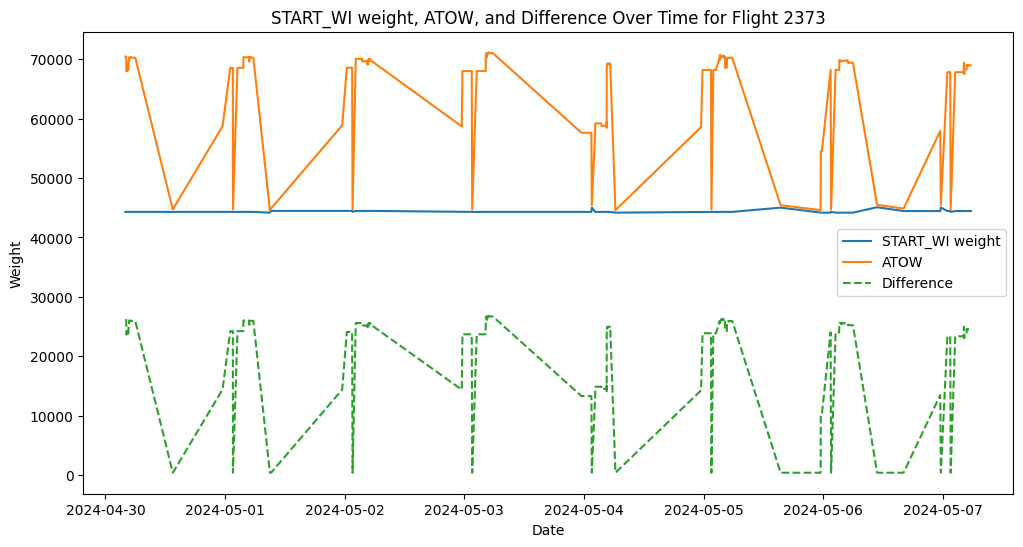

In [114]:
grouped = filtered_data.groupby('flight_number')

flight_data = grouped.get_group(2373)

flight_data['Difference'] = flight_data['ATOW'] - flight_data['START_WI weight']
flight_data.dropna(subset=['Difference'], inplace=True)

# Plot ETOW, ATOW, and the difference over time
plt.figure(figsize=(12,6))
plt.plot(flight_data.index, flight_data['START_WI weight'], label='START_WI weight')
plt.plot(flight_data.index, flight_data['ATOW'], label='ATOW')
plt.plot(flight_data.index, flight_data['Difference'], label='Difference', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.title('START_WI weight, ATOW, and Difference Over Time for Flight 2373')
plt.legend()
plt.show()